-IMDB Dataset
IBDB stands for internet movie database

In [38]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

In [39]:
import numpy as np

def vectorize_seq(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_seq(train_data)
y_train=np.asarray(train_labels).astype('float32')
x_test=vectorize_seq(test_data)
y_test=np.asarray(test_labels).astype('float32')

In [40]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

from keras import optimizers
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=[metrics.binary_accuracy])

In [42]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [43]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 17s 1ms/step - loss: 0.5075 - acc: 0.7843 - val_loss: 0.3800 - val_acc: 0.8691
Epoch 2/20
15000/15000 [==============================] - 14s 903us/step - loss: 0.3001 - acc: 0.9043 - val_loss: 0.2995 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 13s 840us/step - loss: 0.2168 - acc: 0.9282 - val_loss: 0.3082 - val_acc: 0.8723
Epoch 4/20
15000/15000 [==============================] - 14s 901us/step - loss: 0.1738 - acc: 0.9437 - val_loss: 0.2847 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 14s 910us/step - loss: 0.1413 - acc: 0.9550 - val_loss: 0.2855 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 13s 884us/step - loss: 0.1135 - acc: 0.9655 - val_loss: 0.3132 - val_acc: 0.8787
Epoch 7/20
15000/15000 [==============================] - 14s 946us/st

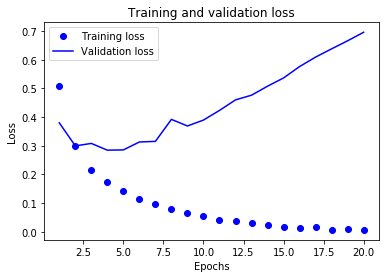

In [45]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

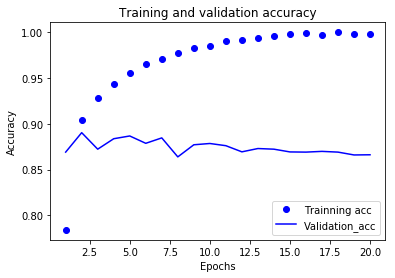

In [46]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Trainning acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result=model.evaluate(x_test,y_test)


Epoch 1/4
25000/25000 [==============================] - 17s 688us/step - loss: 0.4742 - acc: 0.8212
Epoch 2/4
25000/25000 [==============================] - 13s 531us/step - loss: 0.2675 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 12s 474us/step - loss: 0.2033 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 14s 546us/step


In [53]:
print(result)
model.predict(x_test)

[0.3118756478309631, 0.87588]


array([[0.15894896],
       [0.99983984],
       [0.39427713],
       ...,
       [0.08194003],
       [0.0487054 ],
       [0.45480576]], dtype=float32)